In [0]:
!pip install -q keras

In [1]:
import keras
from google.colab import drive

Using TensorFlow backend.


In [2]:
drive.mount('/content/drive', force_remount =True)

Mounted at /content/drive


In [0]:
import numpy as np
from keras.utils import to_categorical

In [0]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, array_to_img

In [0]:
!pip show keras

## Prediction Models

In [5]:
from keras.applications import vgg16, vgg19, resnet50, inception_v3, inception_resnet_v2, xception, densenet, nasnet

# #224x224 input models
# #Load the VGG model
vgg16_model = vgg16.VGG16(weights='imagenet')

# #Load the VGG model
vgg19_model = vgg19.VGG19(weights='imagenet')

# #Load the ResNet50 model
resnet50_model = resnet50.ResNet50(weights='imagenet')

# #Load the DenseNet121 model
densenet121_model = densenet.DenseNet121(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

# #Load the DenseNet169 model
densenet169_model = densenet.DenseNet169(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

# #Load the DenseNet201 model
densenet201_model = densenet.DenseNet201(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

##----------------------------------------##

#299x299 input models
#Load the Inception_V3 model 
inceptionv3_model = inception_v3.InceptionV3(weights='imagenet') 

#Load the InceptionResNetV2 model
inception_resnet_v2_model = inception_resnet_v2.InceptionResNetV2(weights='imagenet')

#Load the Xception model
xception_model = xception.Xception(weights='imagenet')

##----------------------------------------##

#Need 331x331
#Load the NASNet model 
nasnet_model = nasnet.NASNetLarge(weights='imagenet') 


Instructions for updating:
Colocations handled automatically by placer.


## Load Labels

In [0]:
y_val = np.load("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/y_val.npy")

In [0]:
#Do this once!
#Make rows in y_val a multiple of 3500; coz we have 3500 rows
if y_val.shape[0] == 50000:
  y_val = np.append (y_val, np.zeros(2500)) 

y_val = y_val.reshape((15, 3500 ))
y_val_one_hot = to_categorical(y_val[0], 1000)

In [0]:
keras_idx_to_name = {}
f = open("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/synset_words.txt","r")
idx = 0
for line in f:
    parts = line.split(" ")
    keras_idx_to_name[idx] = " ".join(parts[1:])
    idx += 1
f.close()  

# BenchMarking Logic

In [0]:
def top_k_accuracy(y_true, y_pred, k=1):
    '''From: https://github.com/chainer/chainer/issues/606
    
    Expects both y_true and y_pred to be one-hot encoded.
    '''
    argsorted_y = np.argsort(y_pred)[:,-k:]
    return np.any(argsorted_y.T == y_true.argmax(axis=1), axis=0).mean()

In [0]:
def savePredictionToDrive(m_i, val):
  base_path = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetBenchMarkingResults/Predictions/"
  np.save(base_path + str(m_i) + ".npy", val)

def loadPredictionsFromDrive(m_i):
  base_path = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetBenchMarkingResults/Predictions/"
  return np.load(base_path + str(m_i) + ".npy")

In [0]:
def preprocessData(x_val, mClass):
  if mClass == 0:
    x_val = vgg16.preprocess_input(x_val) # converted to BGR
  elif mClass == 1:
    x_val = vgg19.preprocess_input(x_val) # converted to BGR
  elif mClass == 2:
    x_val = resnet50.preprocess_input(x_val) # converted to BGR
  elif mClass == 3:
    x_val = densenet.preprocess_input(x_val) # converted to BGR
  elif mClass == 4:
    x_val = densenet.preprocess_input(x_val) # converted to BGR
  elif mClass == 5:
    x_val = densenet.preprocess_input(x_val) # converted to BGR
  elif mClass == 6:
    x_val = inception_v3.preprocess_input(x_val) # converted to BGR
  elif mClass == 7:
    x_val = inception_resnet_v2.preprocess_input(x_val) # converted to BGR
  elif mClass == 8:
    x_val = xception.preprocess_input(x_val) # converted to BGR
  elif mClass == 9:
    x_val = nasnet.preprocess_input(x_val) # converted to BGR
  return x_val


def getModel(mClass):
  if mClass == 0:
    x_val = vgg16_model
  elif mClass == 1:
    x_val = vgg19_model
  elif mClass == 2:
    x_val = resnet50_model
  elif mClass == 3:
    x_val = densenet121_model
  elif mClass == 4:
    x_val = densenet169_model
  elif mClass == 5:
    x_val = densenet201_model
  elif mClass == 6:
    x_val = inceptionv3_model
  elif mClass == 7:
    x_val = inception_resnet_v2_model
  elif mClass == 8:
    x_val = xception_model
  elif mClass == 9:
    x_val = nasnet_model
  return x_val

In [0]:
def savePredictions(predictionModels, imageRes = "224x224", base = 0):
  
  # imageRes = "224x224"
  # imageRes = "299x299"
  # imageRes = "331x331"

  X = ["" for x in range(7)]
  X[0] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_1.npy"
  X[1] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_2.npy"
  X[2] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_3.npy"
  X[3] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_4.npy"
  X[4] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_5.npy"
  X[5] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_6.npy"
  X[6] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_7.npy"
  #X[7] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_8.npy"
  

  totalModels = len(predictionModels)
  print(totalModels)
  print(predictionModels[0])
  
  for i in range(0, len(X)):
    x_val = np.load(X[i]) # loaded as RGB
    for m_i in range(0, totalModels):
      x_val_p = preprocessData(x_val, m_i+base)
      pred = predictionModels[m_i].predict(x_val_p)
      savePredictionToDrive(str(m_i+base) + "_" + str(i), pred)

In [0]:
def processPredictions(totalModels):
  
  Y_PREDS = np.zeros(totalModels*7*500*1000)
  Y_PREDS = Y_PREDS.reshape(totalModels, 7*500,1000)

  for m_i in range(0, totalModels):
    Mi_PRED = np.zeros(7*500*1000)
    Mi_PRED = Mi_PRED.reshape(7, 500, 1000)
    for f_i in range(0, 7):
      Mi_PRED[f_i] = loadPredictionsFromDrive(str(m_i) + "_" + str(f_i))
    Y_PREDS[m_i] = Mi_PRED.reshape(3500,1000)
      
  K = 10
  topKPredictions = np.zeros(K*totalModels).reshape(totalModels,K)

  for k in range(1,K+1):
    for m_i in range(0, totalModels):
#       print(top_k_accuracy(y_val_one_hot, Y_PREDS[m_i], k))
      topKPredictions[m_i, k-1] = top_k_accuracy(y_val_one_hot, Y_PREDS[m_i], k)
    
  return topKPredictions


# Run the tests

## 224x224 input models

In [0]:
imageRes = "224x224"

models = []
models.append(vgg16_model)
models.append(vgg19_model)
models.append(resnet50_model)
models.append(densenet121_model)
models.append(densenet169_model)
models.append(densenet201_model)
 

savePredictions(predictionModels = models, imageRes = imageRes, base = 0)

6


## 299x299 input models

In [62]:
imageRes = "299x299"

models = []
models.append(inceptionv3_model)
models.append(inception_resnet_v2_model)
models.append(xception_model)

savePredictions(predictionModels = models, imageRes = imageRes, base = 6)


3


## 331x331 input models

In [63]:
imageRes = "331x331"

models = []
models.append(nasnet_model)

savePredictions(predictionModels = models, imageRes = imageRes, base = 9)

1


# Results and Analysis

In [0]:
modelName = [ "VGG16", "VGG19", "RESNET50", "DENSENET121", "DENSENET169", "DENSENET201", "INCEPTIONV3", "INCEPTION_RESNET_V2", "XCEPTION", "NASNET" ]

In [65]:
topKPredictions = processPredictions(10)

out = ","
for k in range(0, 10):
  out = out + "Top-" + str(k+1) + ","
out = out + "\n"

for m_i in range(0, len(modelName)):
  out = out + modelName[m_i] + ","
  for k in range(0, 10):
    out = out + str(topKPredictions[m_i, k]) + ","
  out = out + "\n"

print(out)

,Top-1,Top-2,Top-3,Top-4,Top-5,Top-6,Top-7,Top-8,Top-9,Top-10,
VGG16,0.7011428571428572,0.8134285714285714,0.8585714285714285,0.8862857142857142,0.9,0.9105714285714286,0.9217142857142857,0.9291428571428572,0.9314285714285714,0.9354285714285714,
VGG19,0.6871428571428572,0.7957142857142857,0.8465714285714285,0.8682857142857143,0.888,0.9002857142857142,0.9097142857142857,0.9165714285714286,0.9225714285714286,0.9257142857142857,
RESNET50,0.1317142857142857,0.1802857142857143,0.21171428571428572,0.23514285714285715,0.2517142857142857,0.26771428571428574,0.284,0.2945714285714286,0.30342857142857144,0.3137142857142857,
DENSENET121,0.44057142857142856,0.5608571428571428,0.622,0.6608571428571428,0.6868571428571428,0.7088571428571429,0.7248571428571429,0.7388571428571429,0.7497142857142857,0.7568571428571429,
DENSENET169,0.06457142857142857,0.09571428571428571,0.12085714285714286,0.14114285714285715,0.15657142857142858,0.16714285714285715,0.176,0.18685714285714286,0.1977142857142857,0.2077142857

In [66]:
title = "Top-K Error rates"
xLabel = "Top-'k'"
yLabel = "Accuracy %"

plot2DGraph(range(1,11), topKPredictions, modelName, xLabel, yLabel, title)

NameError: ignored

# Plot Util

In [0]:

NUM_COLORS = 10
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'c', 'b']
color = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
cm = plt.get_cmap('gist_rainbow')
color = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


# Plotting helper functions


def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

    
def plot2DGraph(X,Y_DATA, modelName, xLabel, yLabel, title):
  plt.rc("font", size=14)
  plt.figure()
  plt.clf()
  for i in range(0, Y_DATA.shape[0]):
    plt.plot(X, Y_DATA[i]*100, color[i])
#     plt.plot(X, Y_DATA[i]*100, color[i], label=modelName[i])
  
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)
  plt.legend(loc='best')
  plt.title(title)
  plt.show()
  #   export_legend(legend)
  
# NUM_COLORS = 20

# cm = plt.get_cmap('gist_rainbow')
# cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
# scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
# fig = plt.figure()
# ax = fig.add_subplot(111)
# # old way:
# #ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# # new way:
# ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])
# for i in range(NUM_COLORS):
#     ax.plot(np.arange(10)*(i+1))

# fig.savefig('moreColors.png')
# plt.show()


#Sample Predictions

In [0]:
## SAMPLE IMAGE DATA

crow = 'https://pbs.twimg.com/profile_images/595665661470310401/VOb43bbP_400x400.jpg'
wolf = 'https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/A-G/gray-wolf-closeup.adapt.945.1.jpg'
tiger = 'https://steemit-production-imageproxy-upload.s3.amazonaws.com/DQmenD8j2rha9SkqpB1gQDrkuE9FmjBTwxb4eGbmHQ81aGM'
sailboat = 'https://upload.wikimedia.org/wikipedia/commons/d/dd/Inland_cat_sailboat.jpg'
plane = "https://unsplash.com/photos/7ESmHghU_KY/download?force=true"

urls = {crow, wolf, tiger, plane, sailboat}

In [0]:
## DOWNLOAD AND COVERT IMAGE

# !apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import urllib.request
import cv2

# image loader
def url_to_image(url, resize=224):
  """
  downloads an image from url, converts to numpy array,
  resizes, and returns it
  """
  response = urllib.request.urlopen(url)
  img = np.asarray(bytearray(response.read()), dtype=np.uint8)
  img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
  return img

##Single Model Test

In [0]:
import random

m_i = 1
imageRes = "224x224"
# imageRes = "299x299"
# imageRes = "331x331"
X = ["" for x in range(7)]
X[0] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_1.npy"
X[1] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_2.npy"
X[2] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_3.npy"
X[3] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_4.npy"
X[4] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_5.npy"
X[5] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_6.npy"
X[6] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_7.npy"
# X[7] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_8.npy"

y_hot = y_val_one_hot.reshape(7, 500, 1000)

acc = 0.0
acc_s = 0.0
for i in range(0, 7):
  x_val = np.load(X[i]) # loaded as RGB
  x_val_p = preprocessData(x_val, m_i)
  predictions = predictionModels[m_i].predict(x_val_p)
  saved_pred = loadPredictionsFromDrive(str(m_i) + "_" + str(i))
  acc = acc + top_k_accuracy(y_hot[i], predictions, 1)
  acc_s = acc_s + top_k_accuracy(y_hot[i], saved_pred, 1)
  
  j = random.randint(0,500) #pick a random image
  plt.figure()
  plt.imshow(x_val[j] / 255.0)
  plt.title(keras_idx_to_name[y_val[0][i*500 + j]])
  plt.show()
  plt.close()
  for prediction in decode_predictions(predictions[j].reshape(1,1000))[0]:
    print(prediction[1], prediction[2])   
  
print(acc)
print(acc_s)
acc = acc/7
print(acc)
acc_s = acc_s/7
print("s:" +  str(acc_s))

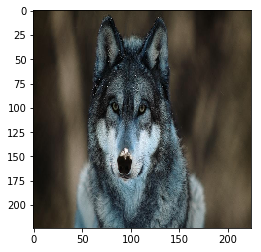

Model Name: Inception_v3
red_wolf 0.18774912
timber_wolf 0.1711418
wallaby 0.12514721
Eskimo_dog 0.11096959
groenendael 0.07941614


In [40]:
m_i = 2
original = url_to_image(wolf, 224)
#   print('PIL original image size',original.size)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)
processed_image = preprocessData(image_batch.copy(), m_i)
predictions = predictionModels[m_i].predict(processed_image)


# print("Model Name: " + modelName[m_i]) 
print("Model Name: " + "Inception_v3") 
for prediction in decode_predictions(predictions)[0]:
  print(prediction[1], prediction[2])    

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions

predictionModels = []
predictionModels.append(vgg16_model)
predictionModels.append(vgg19_model)
predictionModels.append(resnet50_model)
predictionModels.append(densenet121_model)
predictionModels.append(densenet169_model)
predictionModels.append(densenet201_model)
predictionModels.append(inceptionv3_model)
predictionModels.append(inception_resnet_v2_model)
predictionModels.append(xception_model)
predictionModels.append(nasnet_model)


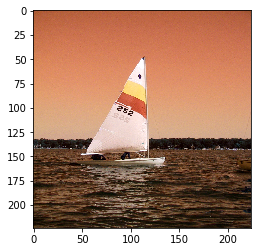

Model Name: VGG16
catamaran 0.4891976
trimaran 0.2994389
yawl 0.20314255
schooner 0.007337096
space_shuttle 0.00024042204


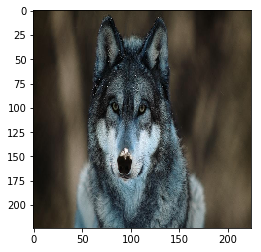

Model Name: VGG16
timber_wolf 0.8094507
coyote 0.082348116
red_wolf 0.061980844
white_wolf 0.030452272
dingo 0.005853034


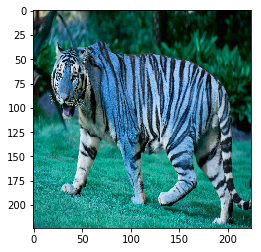

Model Name: VGG16
tiger 0.76583254
tiger_cat 0.18958415
zebra 0.026398264
tabby 0.0033949113
triceratops 0.0022137463


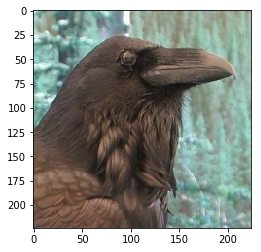

Model Name: VGG16
jay 0.25087246
bulbul 0.10410882
coucal 0.07378549
hen 0.07300377
worm_fence 0.035739403


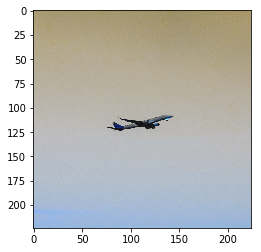

Model Name: VGG16
airship 0.38105848
warplane 0.23672377
airliner 0.10575751
wing 0.053244285
parachute 0.026794482
_____________________________


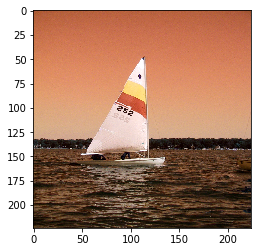

Model Name: VGG19
catamaran 0.44486418
yawl 0.30626225
trimaran 0.2111321
schooner 0.037276555
missile 7.581023e-05


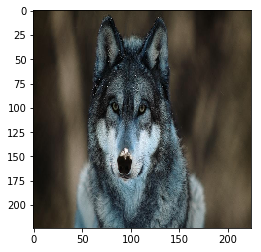

Model Name: VGG19
timber_wolf 0.6623926
white_wolf 0.1505636
red_wolf 0.06164497
dingo 0.05386228
coyote 0.026815033


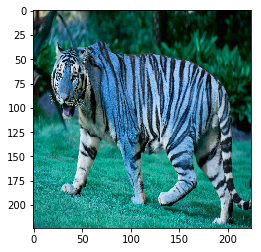

Model Name: VGG19
tiger 0.74683553
tiger_cat 0.22739582
zebra 0.012365932
tabby 0.0031518016
Egyptian_cat 0.00204058


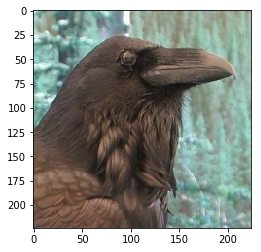

Model Name: VGG19
coucal 0.26331922
kite 0.17352876
bulbul 0.13488038
jay 0.10846225
hen 0.06937918


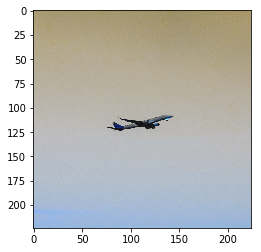

Model Name: VGG19
warplane 0.35502785
airship 0.26218313
wing 0.09333755
airliner 0.088395245
space_shuttle 0.017463196
_____________________________


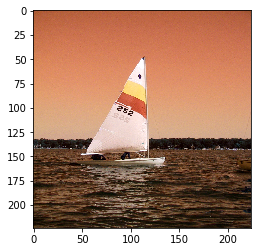

Model Name: RESNET50
yawl 0.43911445
catamaran 0.30459502
trimaran 0.15244302
schooner 0.08784659
beacon 0.009550733


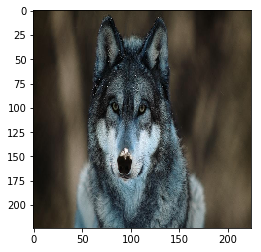

Model Name: RESNET50
red_wolf 0.18774912
timber_wolf 0.1711418
wallaby 0.12514721
Eskimo_dog 0.11096959
groenendael 0.07941614


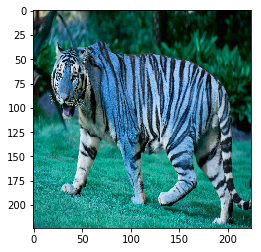

Model Name: RESNET50
tiger 0.6186674
tiger_cat 0.3738919
tabby 0.003064221
zebra 0.0020862578
jaguar 0.000966412


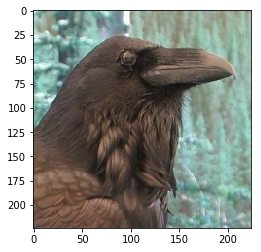

Model Name: RESNET50
kite 0.15745938
king_penguin 0.12384814
otter 0.10045553
sea_lion 0.070058465
water_ouzel 0.06266444


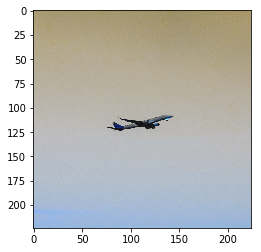

Model Name: RESNET50
agama 0.2741031
warplane 0.2423193
American_alligator 0.17126586
terrapin 0.05960122
wing 0.031912275
_____________________________


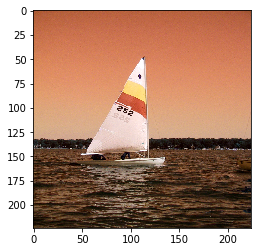

Model Name: DENSENET121
catamaran 0.50648344
trimaran 0.3113425
yawl 0.17372371
schooner 0.0041713277
lifeboat 0.0010841172


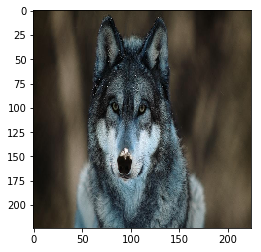

Model Name: DENSENET121
timber_wolf 0.72317666
white_wolf 0.08523692
Eskimo_dog 0.07774452
coyote 0.027869819
Norwegian_elkhound 0.026870195


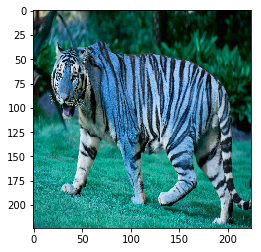

Model Name: DENSENET121
tiger 0.8296993
tiger_cat 0.15027773
snow_leopard 0.0044900985
jaguar 0.003637004
tabby 0.0035069713


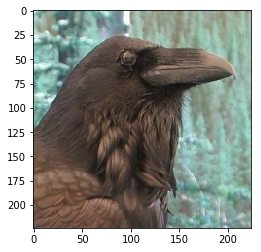

Model Name: DENSENET121
vulture 0.19092582
jay 0.1597835
bulbul 0.13590452
water_ouzel 0.08093388
kite 0.061158955


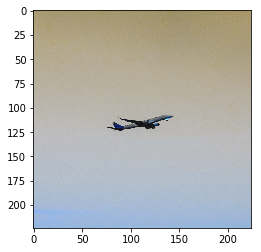

Model Name: DENSENET121
wing 0.39726016
warplane 0.33225614
airliner 0.22668986
airship 0.023404162
space_shuttle 0.013570334
_____________________________


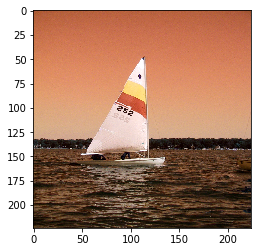

Model Name: DENSENET169
catamaran 0.84063697
trimaran 0.13818905
yawl 0.0146053145
beacon 0.0025967814
airliner 0.0009346051


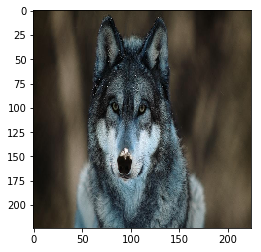

Model Name: DENSENET169
timber_wolf 0.33599994
Eskimo_dog 0.14115244
dingo 0.1296646
red_wolf 0.10923832
Norwegian_elkhound 0.10005456


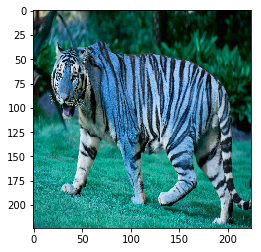

Model Name: DENSENET169
tiger 0.649094
tiger_cat 0.20751159
zebra 0.07850694
jaguar 0.02518751
Egyptian_cat 0.013853215


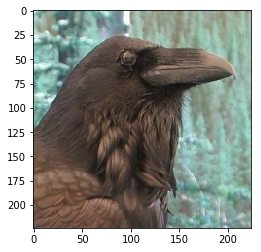

Model Name: DENSENET169
kite 0.29875794
prairie_chicken 0.14428623
hen 0.12260767
ruffed_grouse 0.056865808
vulture 0.045578636


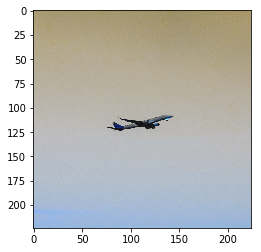

Model Name: DENSENET169
warplane 0.69959515
space_shuttle 0.17780761
airliner 0.08083394
wing 0.03176165
American_alligator 0.0012549522
_____________________________


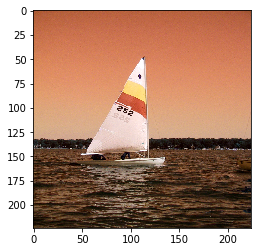

Model Name: DENSENET201
catamaran 0.8766166
trimaran 0.115201764
yawl 0.0053652916
schooner 0.00090627244
breakwater 0.00048551755


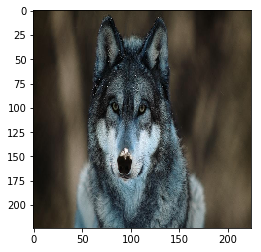

Model Name: DENSENET201
timber_wolf 0.5682384
dingo 0.20986298
red_wolf 0.076466024
Eskimo_dog 0.035843287
white_wolf 0.022387946


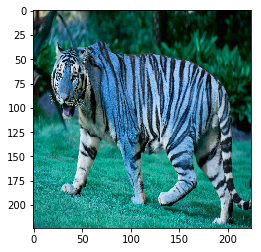

Model Name: DENSENET201
tiger 0.7031939
tiger_cat 0.27062932
zebra 0.015351902
tabby 0.0033367064
jaguar 0.0016601984


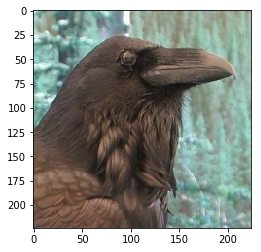

Model Name: DENSENET201
coucal 0.16977356
king_penguin 0.16160063
water_ouzel 0.07929
ruffed_grouse 0.044790823
black_grouse 0.04465619


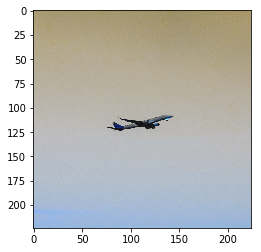

Model Name: DENSENET201
wing 0.50137985
warplane 0.23773094
airliner 0.21418497
space_shuttle 0.012688206
dragonfly 0.010106114
_____________________________


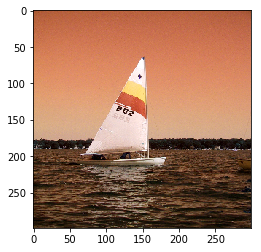

Model Name: INCEPTIONV3
yawl 0.74278194
catamaran 0.06762023
trimaran 0.051548176
schooner 0.024784299
pirate 0.00096685544


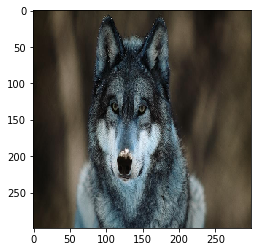

Model Name: INCEPTIONV3
timber_wolf 0.47055176
red_wolf 0.22816695
dingo 0.10813621
coyote 0.040648885
white_wolf 0.025955658


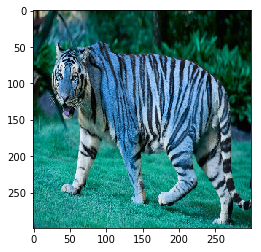

Model Name: INCEPTIONV3
tiger 0.61195195
tiger_cat 0.32815865
zebra 0.015132391
jaguar 0.0012897581
tabby 0.0010373356


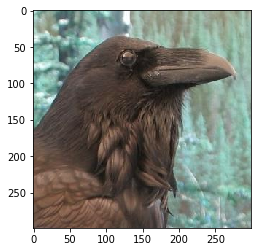

Model Name: INCEPTIONV3
kite 0.07434336
black_stork 0.06905833
hen 0.05422361
bittern 0.047687586
magpie 0.03828306


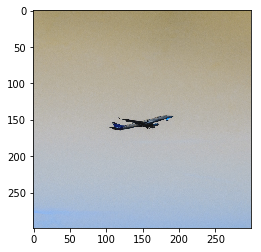

Model Name: INCEPTIONV3
wing 0.22764136
warplane 0.20210698
airliner 0.10795555
macaw 0.014211034
aircraft_carrier 0.008842541
_____________________________


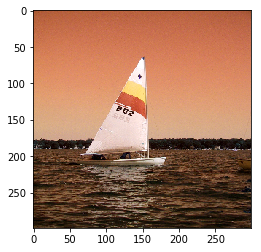

Model Name: INCEPTION_RESNET_V2
trimaran 0.5589121
catamaran 0.27919763
yawl 0.03540515
schooner 0.009480708
sandbar 0.0009860332


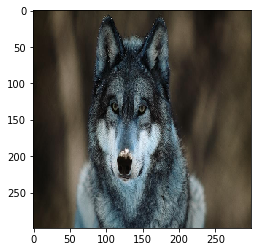

Model Name: INCEPTION_RESNET_V2
timber_wolf 0.7242257
red_wolf 0.06194935
dingo 0.046744585
white_wolf 0.033235587
coyote 0.018675542


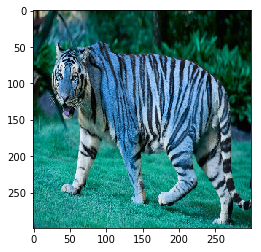

Model Name: INCEPTION_RESNET_V2
tiger 0.7414421
tiger_cat 0.19432712
lynx 0.0011566633
tabby 0.0009052429
jaguar 0.00067685085


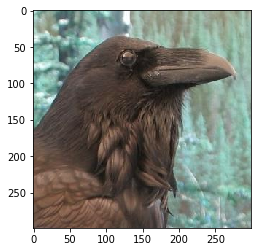

Model Name: INCEPTION_RESNET_V2
magpie 0.24827105
jay 0.19537137
coucal 0.0980203
hen 0.07825344
kite 0.052648403


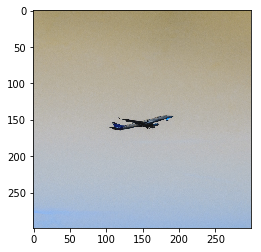

Model Name: INCEPTION_RESNET_V2
airliner 0.78016794
wing 0.07359365
warplane 0.05810078
space_shuttle 0.021539195
airship 0.0012400938
_____________________________


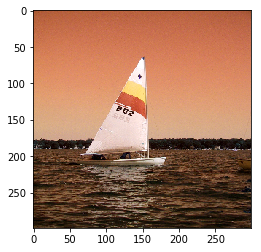

Model Name: XCEPTION
trimaran 0.47232452
catamaran 0.42135522
yawl 0.04569987
schooner 0.0027833784
airliner 0.00085644197


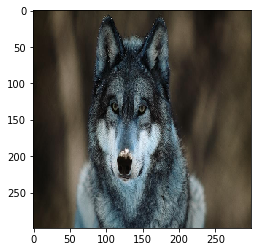

Model Name: XCEPTION
timber_wolf 0.63299793
red_wolf 0.07683703
dingo 0.05164989
white_wolf 0.046694435
dhole 0.013465233


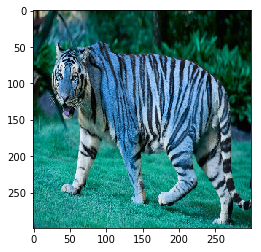

Model Name: XCEPTION
tiger 0.72005135
tiger_cat 0.22883718
zebra 0.0044271518
jaguar 0.0029002118
tabby 0.0012123623


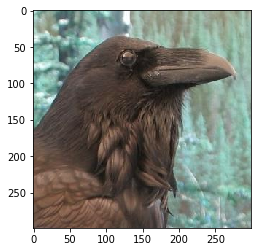

Model Name: XCEPTION
jay 0.31531143
magpie 0.290948
kite 0.020832207
coucal 0.014239923
quail 0.011519428


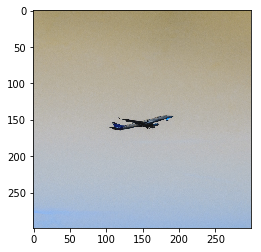

Model Name: XCEPTION
airliner 0.58120483
warplane 0.15901957
wing 0.10088191
space_shuttle 0.014064204
pelican 0.0032077867
_____________________________


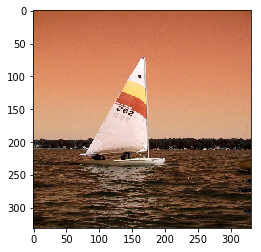

Model Name: NASNET
trimaran 0.50667095
catamaran 0.37220913
yawl 0.009997172
schooner 0.0021963897
dock 0.00072444166


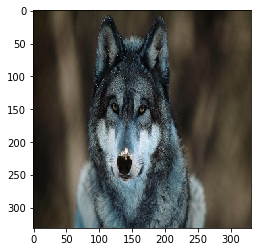

Model Name: NASNET
timber_wolf 0.6202535
red_wolf 0.09594487
dingo 0.083097614
white_wolf 0.045092117
coyote 0.017652147


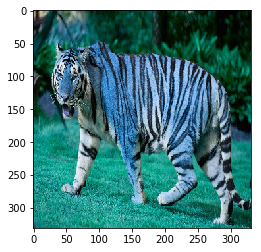

Model Name: NASNET
tiger 0.75563973
tiger_cat 0.16043054
jaguar 0.0011712213
zebra 0.001007434
lynx 0.00094284274


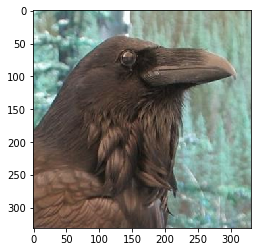

Model Name: NASNET
kite 0.64073724
hen 0.033199854
quail 0.01999108
jay 0.018610124
coucal 0.0148176635


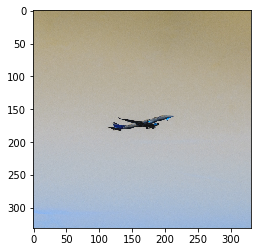

Model Name: NASNET
airliner 0.63350576
warplane 0.20981129
wing 0.07001
space_shuttle 0.0033336685
macaw 0.0013066112
_____________________________


In [37]:
## RUN TESTS

for m_i in range(0, len(predictionModels)):
  for url in urls: 
  #   print(url)
    original = ""
    if m_i <6:
      original = url_to_image(url, 224)
    elif m_i <9:
      original = url_to_image(url, 299)
    else:
      original = url_to_image(url, 331)
    
  #   print('PIL original image size',original.size)
    plt.imshow(original)
    plt.show()

    # convert the PIL image to a numpy array
    # IN PIL - image is in (width, height, channel)
    # In Numpy - image is in (height, width, channel)a
    numpy_image = img_to_array(original)
  #   plt.imshow(np.uint8(numpy_image))
    # plt.show()
  #   print('numpy array size',numpy_image.shape)

    # Convert the image / images into batch format
    # expand_dims will add an extra dimension to the data at a particular axis
    # We want the input matrix to the network to be of the form (batchsize, height, width, channels)
    # Thus we add the extra dimension to the axis 0.
    image_batch = np.expand_dims(numpy_image, axis=0)
    #  print('image batch size', image_batch.shape)

    processed_image = preprocessData(image_batch.copy(), m_i)
    # get the predicted probabilities for each class
    predictions = predictionModels[m_i].predict(processed_image)
    
    print("Model Name: " + modelName[m_i]) 
    # print predictions
    # convert the probabilities to class labels
    # We will get top 5 predictions which is the default
    for prediction in decode_predictions(predictions)[0]:
      print(prediction[1], prediction[2])    
      
  print("_____________________________")